# Chapter 3 Homework

Problems use samples from the posterior for the globe tossing distribution

In [19]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.72)


In [2]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size=9, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)

## Easy Problems

### 3E1. How much posterior probability lies below $p=0.2$?

In [6]:
length(samples[samples < 0.2]) / length(samples)

[1] 5e-04

### 3E2. How much posterior probability lies above $p=0.8$?

In [8]:
length(samples[samples > 0.8]) / length(samples)

[1] 0.1117

### 3E3. How much posterior probability lies between $p=0.2$ and $p=0.8$?

In [9]:
1 - 5e-4 - 0.1117

[1] 0.8878

### 3E4. 20% of the posterior probability lies below which value of $p$?

In [17]:
quantile(samples, probs = 0.2)

20% 
0.5195195

### 3E5. 20% of the posterior probability lies above which value of $p$?

In [18]:
quantile(samples, probs = 0.8)

80% 
0.7567568

### 3E6. Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

In [21]:
HPDI(samples, 0.66)

|0.66     0.66| 
0.5205205 0.7847848

### 3E7. Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [23]:
PI(samples, 0.66)

17%       83% 
0.5005005 0.7687688

## Medium Problems

### 3M1. Suppose the globe tossing experiment turned out to be 8 water in 15 tosses. Construct the posterior using grid approximation, using the same flat prior as before.

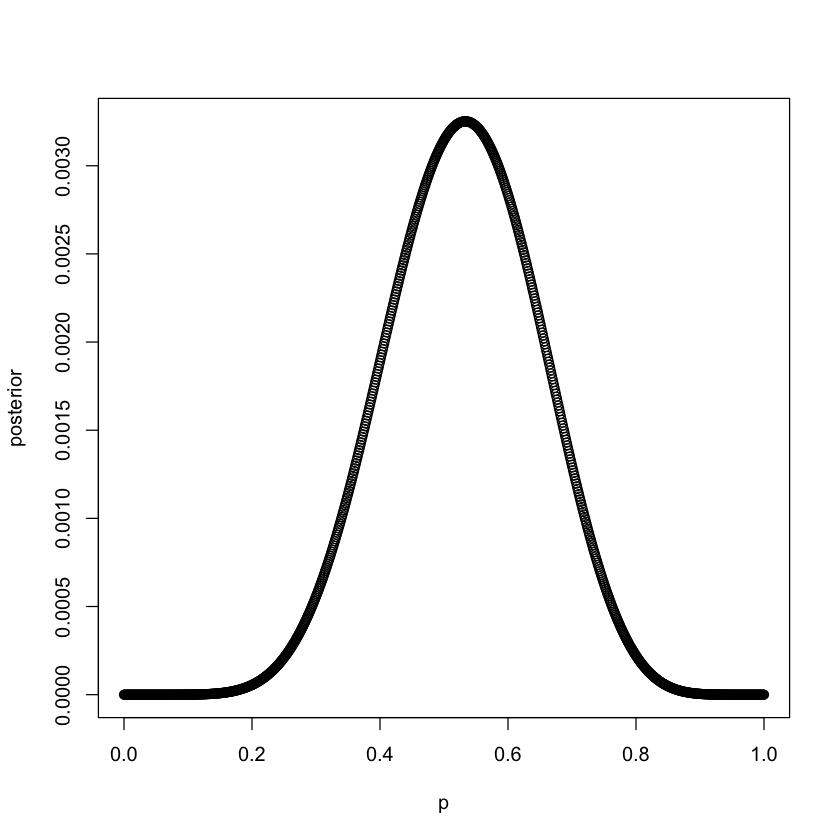

In [28]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(8, size=15, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(x=p_grid,
     y=posterior,
     xlab="p")

### 3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for $p$.

In [32]:
set.seed(100)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.3243243 0.7157157

### 3M3. Construct the posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $p$. What is the probability of observing 8 water in 15 tosses?

[1] 0.1438

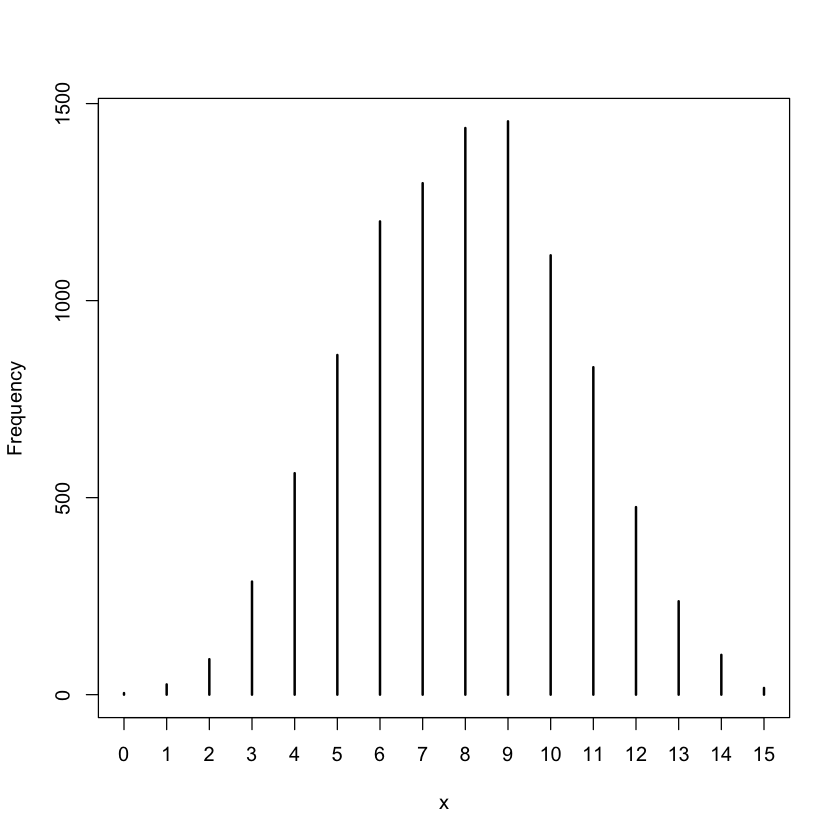

In [43]:
w <- rbinom(n=1e4, size=15, prob=samples)
simplehist(w)
length(w[w == 8]) / length(w)

### 3M4. Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

[1] 0.1689

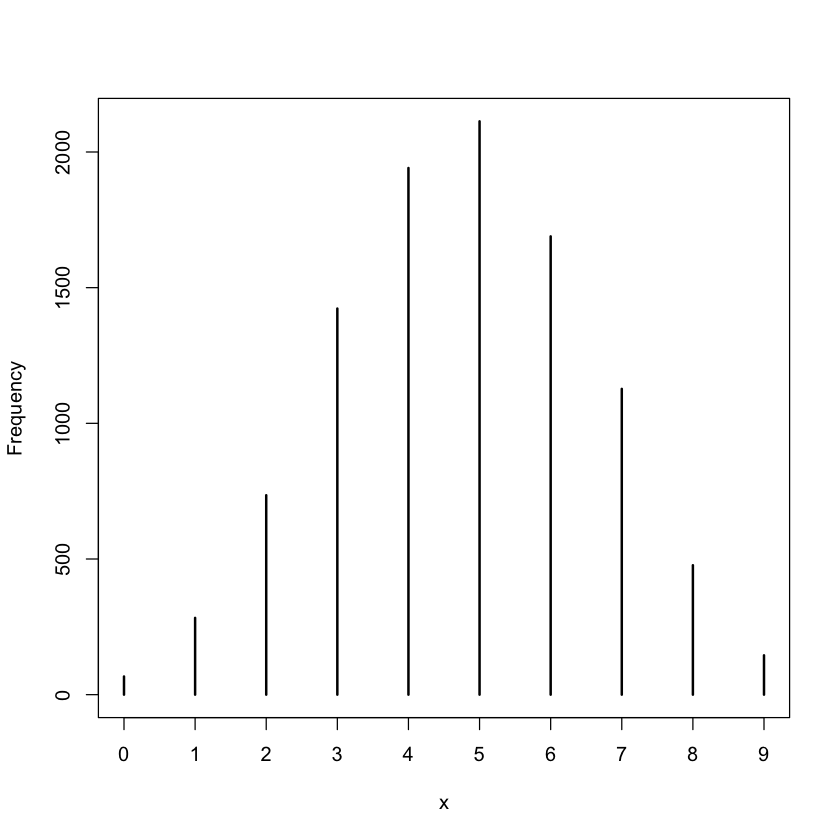

In [50]:
w <- rbinom(n=1e4, size=9, prob=samples)
simplehist(w)
length(w[w==6]) / length(w)

### Redo the medium problems, but with step function prior at 0.5. Compare the inferences.

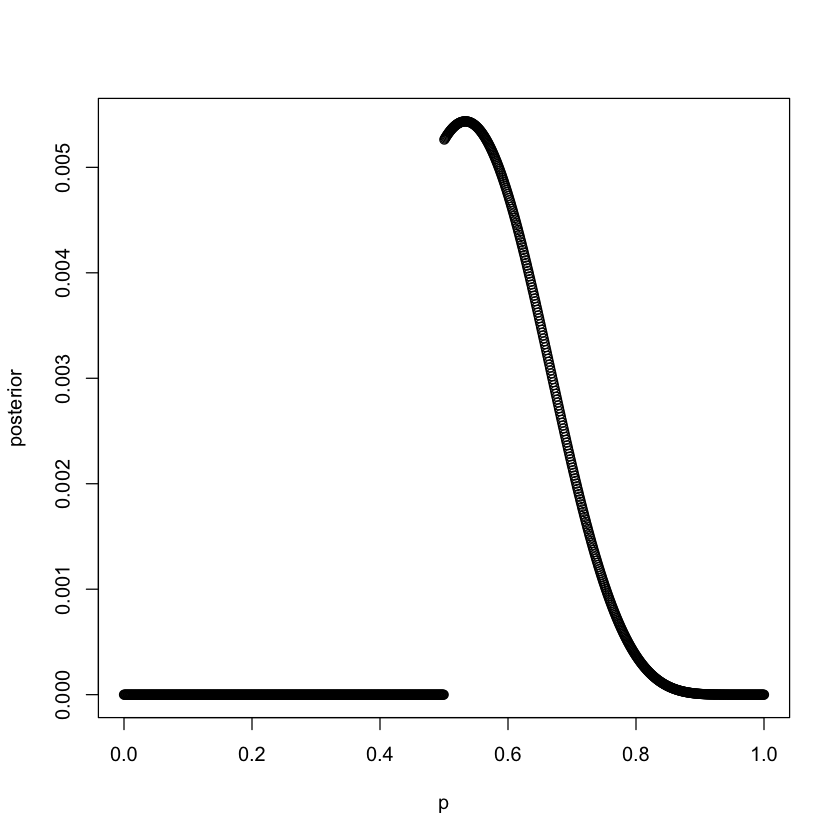

In [69]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- ifelse(p_grid < 0.5, 0, 1)
likelihood <- dbinom(8, size=15, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(x=p_grid,
     y=posterior,
     xlab="p")

In [70]:
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.5005005 0.7127127

[1] 0.1621

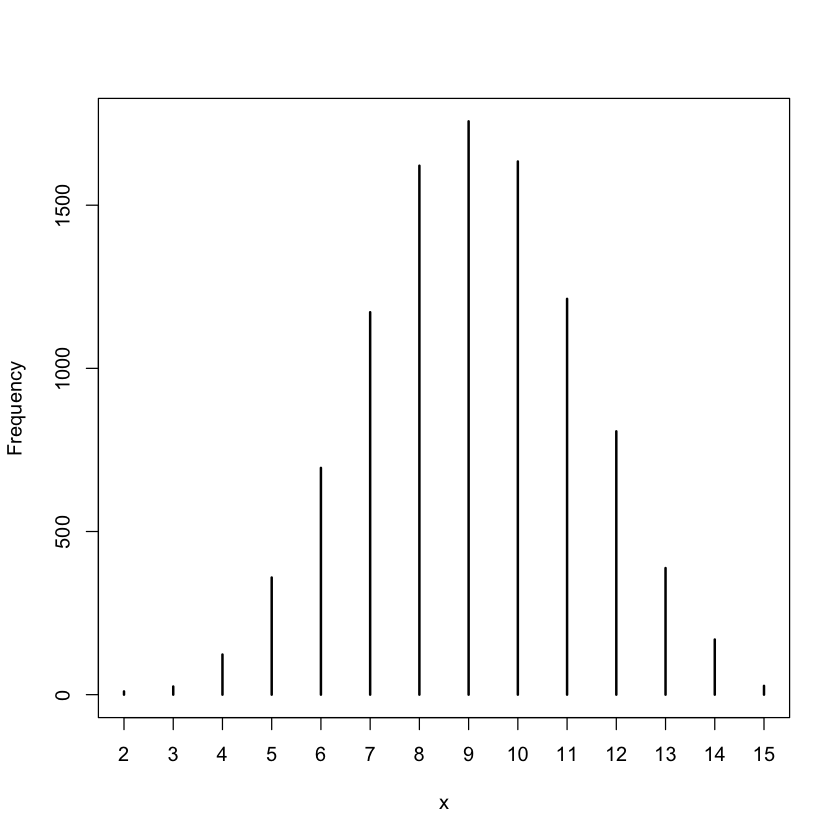

In [71]:
w <- rbinom(n=1e4, size=15, prob=samples)
simplehist(w)
length(w[w==8]) / length(w)

[1] 0.2344

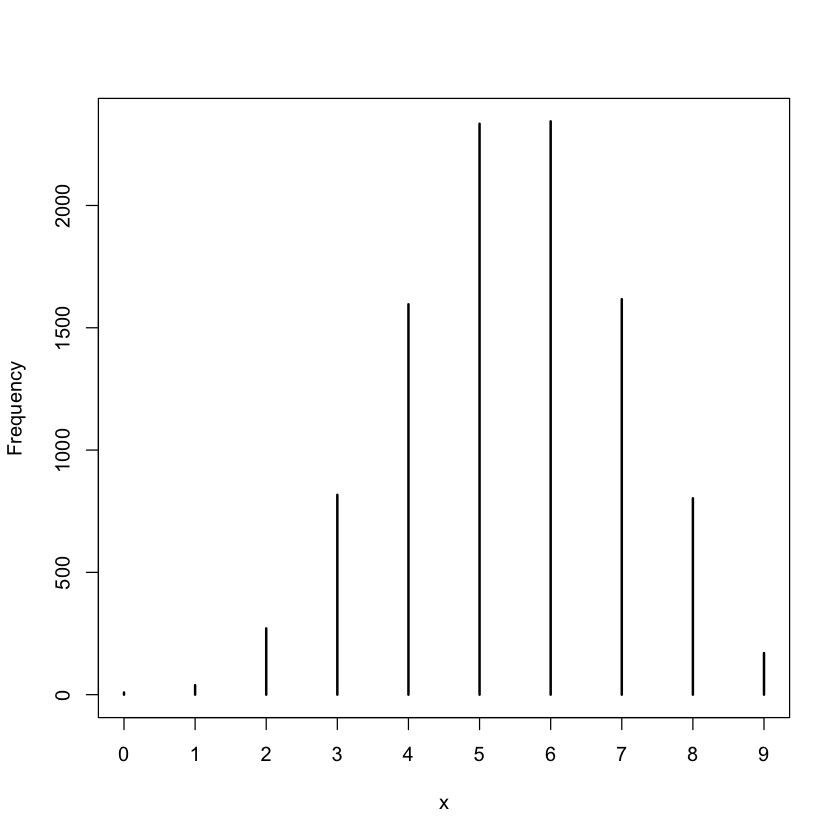

In [72]:
w <- rbinom(n=1e4, size=9, prob=samples)
simplehist(w)
length(w[w==6]) / length(w)

The better prior pushes the posterior distribution to the right, towards the "true" answer.

## Hard Problems

In [3]:
library(rethinking)
data(homeworkch3) # loads two vectors, birth1 and birth2

### 3H1. Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume uniform prior. Which parameter value maximizes the posterior probability?

We have 100 observations of two births. A binomial distribution is a reasonable likelihood function. We can define $Pr(success)$ to be having a boy, and estimate that success rate by looking at our observations. Let $k$ be the number of male births, and $n$ be the total number of births. We assume that birth1 and birth2 are independent, so we combine the results.

In [12]:
n <- length(birth1) + length(birth2)
k <- sum(birth1) + sum(birth2)

In [21]:
p_grid <- seq(from=0, to=1, length.out=1000)
likelihood <- dbinom(k, size=n, prob=p_grid)
prior <- rep(1, 1000)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)

In [22]:
samples <- sample(p_grid, size=1e4, replace=TRUE, prob=posterior)

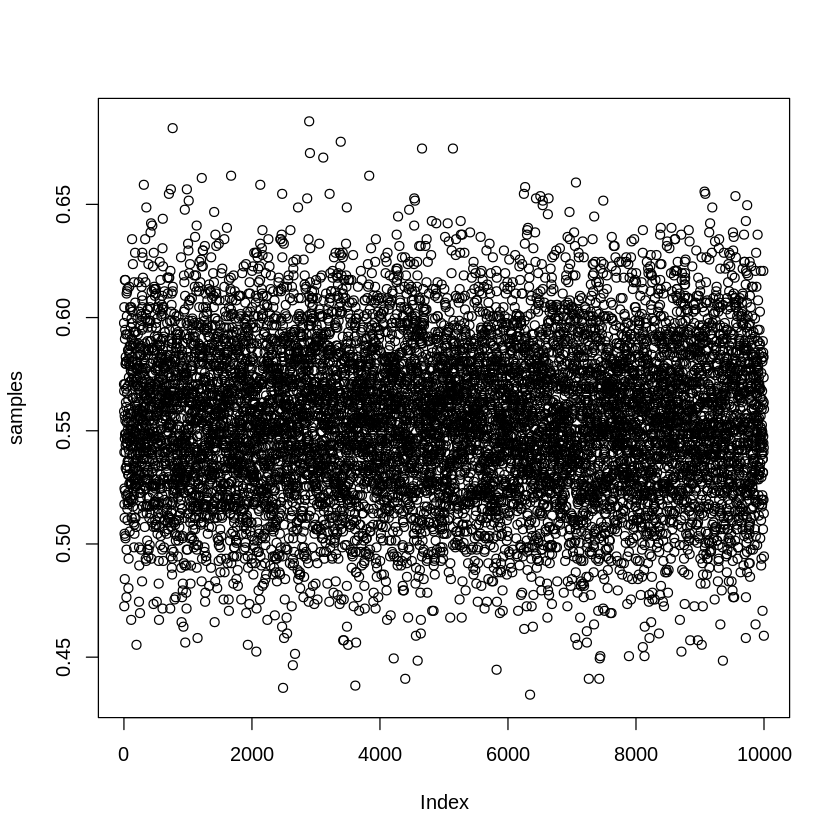

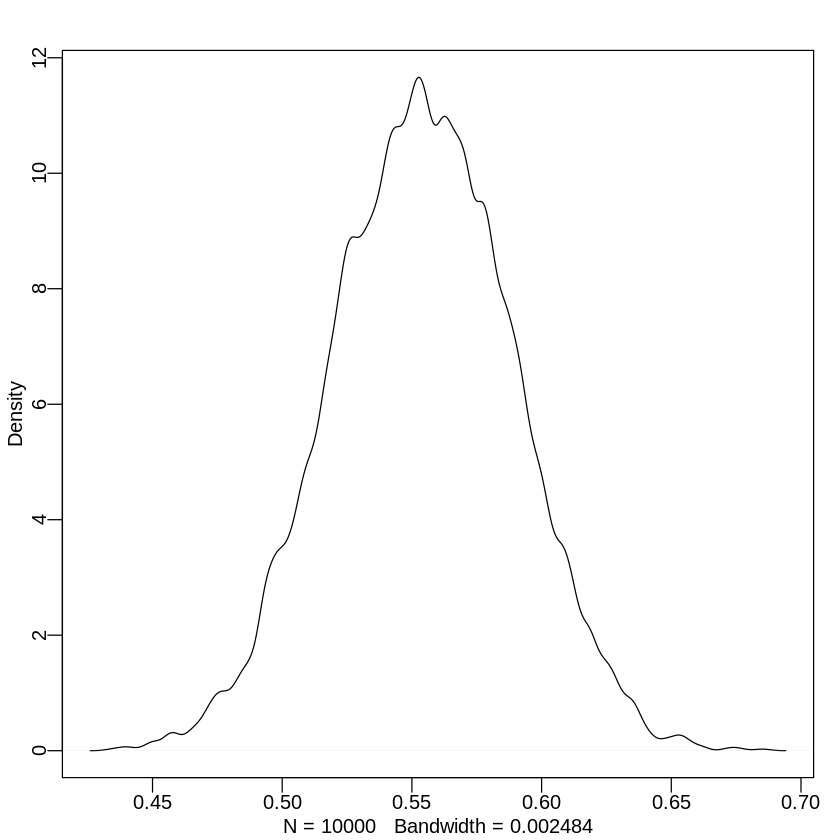

In [27]:
plot(samples)
dens(samples)

In [29]:
chainmode(samples, adj=0.01)

[1] 0.5374836

### 3H2. Using sample function to draw 10,000 random values from posterior distribution. Use samples to find 50%, 89%, and 97% HPDI intervals.

In [34]:
HPDI(samples, 0.5)
HPDI(samples, 0.89)
HPDI(samples, 0.97)

|0.5      0.5| 
0.5305305 0.5775776

|0.89     0.89| 
0.4964965 0.6076076

|0.97     0.97| 
0.4824825 0.6326326

[1] 110.2738

[1] 110.8582

[1] 111

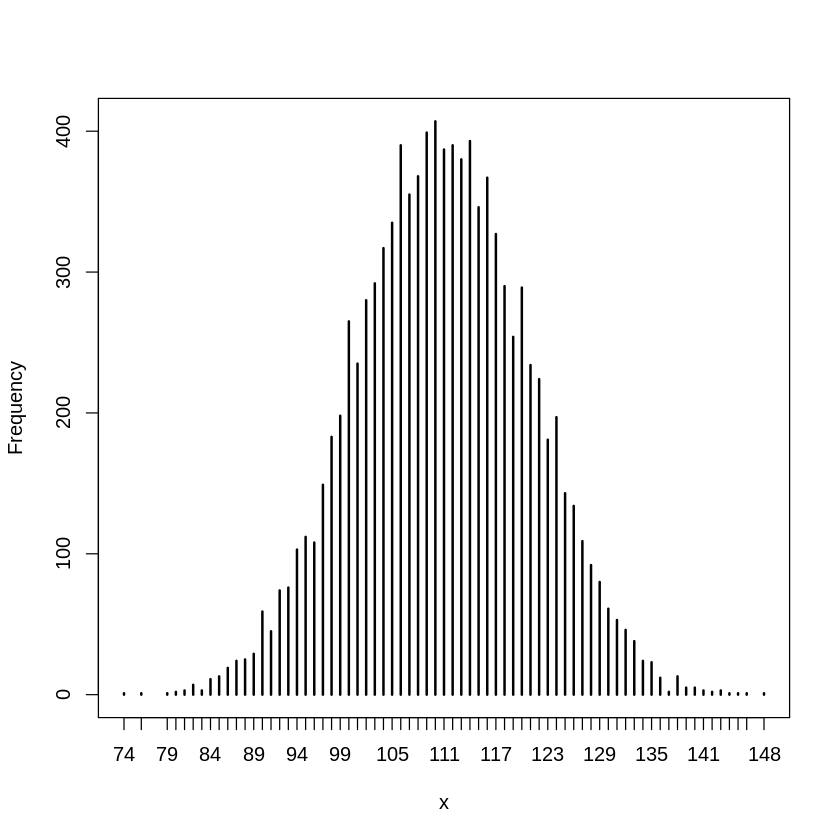

In [43]:
w <- rbinom(n=1e4, size=200, prob=samples)
chainmode(w)
mean(w)
median(w)
simplehist(w)
# The model closely matches the observations.

### 3H4. Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, birth1. How does the model look in this light?

[1] 55.329

[1] 55

[1] 55.23546

[1] 0.51

25% 75% 
 51  59

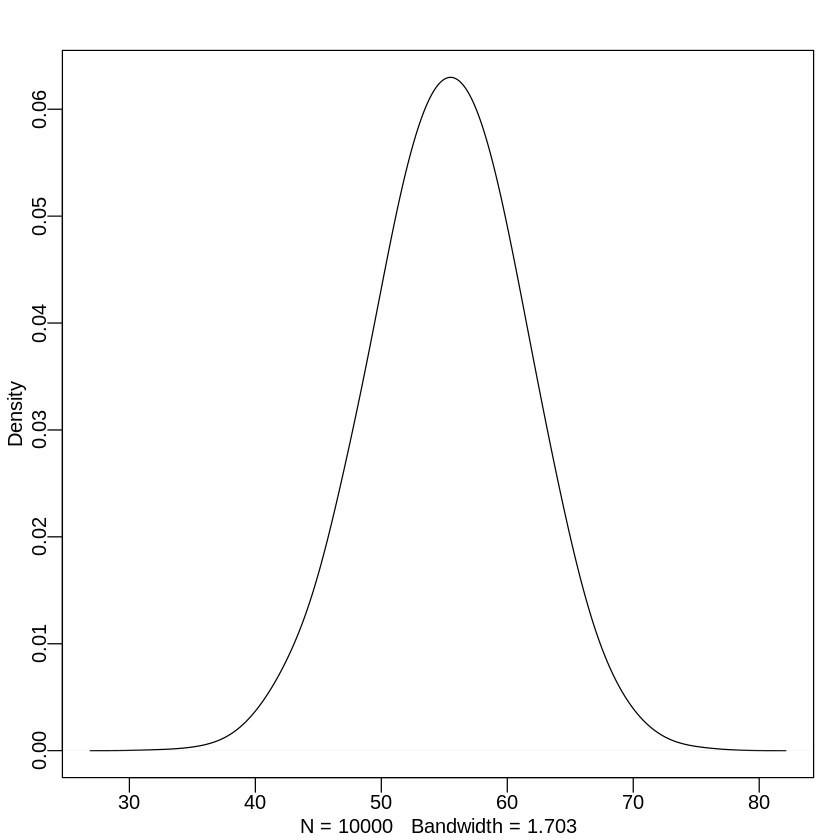

In [64]:
w <- rbinom(n=1e4, size=100, prob=samples)
dens(w, adj=2)
mean(w)
median(w)
chainmode(w)
sum(birth1)/length(birth1)
PI(w, 0.5)
# In birth1, the observed number of male births is 51 out of 100, 
# whereas the model predicts that 55 males should have been born. 
# The distribution of births given by the model is broad.
# The model places the observed 51 male births at the 25% percentile.

### 3H5. The model assumes that sex of first and second births are independent. To check this assumption, focus on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. Count the number of first borns who where girls, simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does it look? Any guess as to what's going on?

In [78]:
bfg = birth2[birth1 == 0]  # births following girls
sum(bfg) / length(bfg)
# ~80% of births following girls result in boys.

[1] 0.7959184

In [79]:
sum(bfg)
length(bfg)

[1] 39

[1] 49

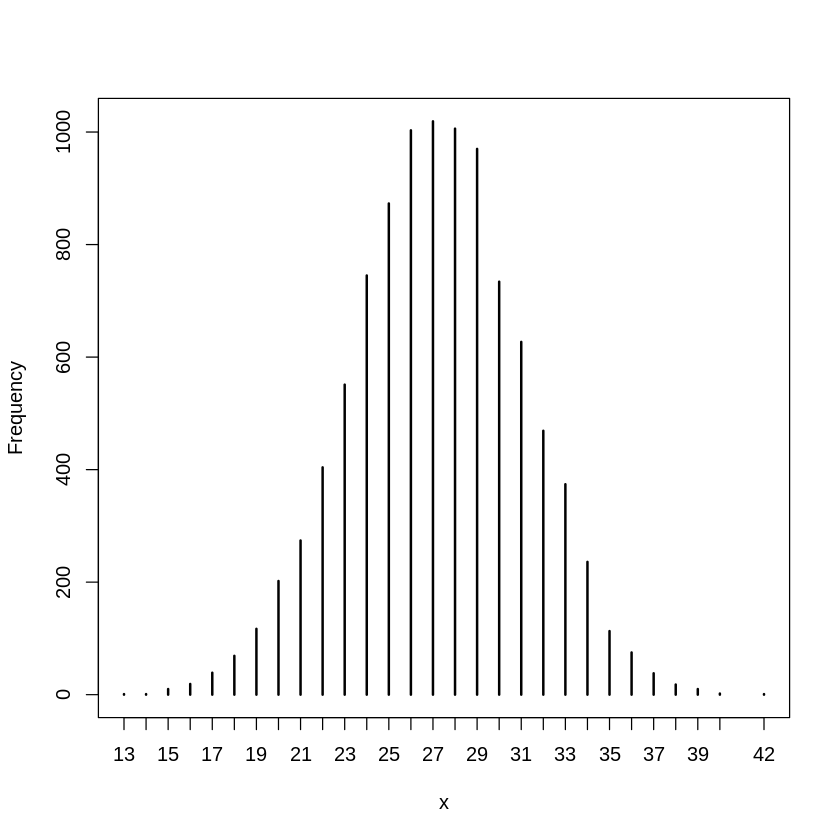

In [80]:
w <- rbinom(n=1e4, size=length(bfg), prob=samples)
simplehist(w)

The model disagrees strongly with the data. The model would predict that about 27 boys would be born among 49 births, whereas the observed number was 39. It appears that the births are not independent. If the first birth results in a girl, than the second birth is much more likely to result in a boy. On the flipside, if the first birth results in a boy, then the second birth follows the model pretty well.

Perhaps there's cultural bias towards having at least one boy and the means to enable biological bias. If, on the first try, parents don't get a boy, they terminate pregnancies the next time until they get a boy.

In [81]:
bfb = birth2[birth1 == 1]  # births following boys
1 - sum(bfb) / length(bfb)
# ~59% of births following boys result in girls.

[1] 0.5882353

In [82]:
length(bfb) - sum(bfb) # girl births
length(bfb)

[1] 30

[1] 51

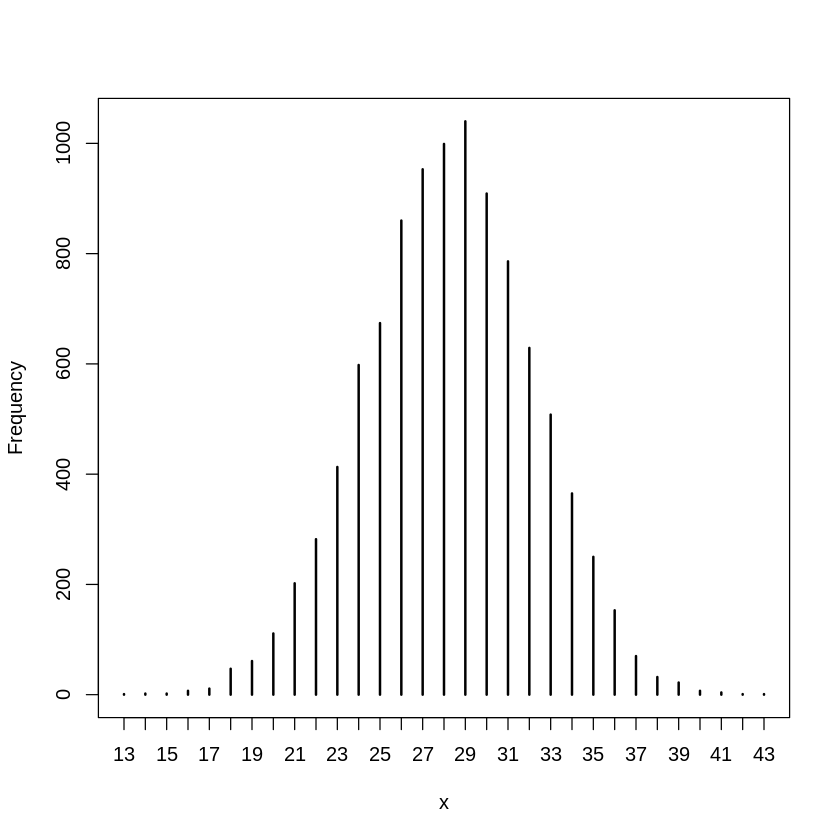

In [83]:
w <- rbinom(n=1e4, size=length(bfb), prob=samples)
simplehist(w)